# ¿Cómo calcular el tamaño del spot enfocado con un objetivo?




In [3]:
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt

El rayo del láser tiene un diámetro nominal de $D mm$ ( intensidad $\frac{1 }{ e^2} $) y la lente del objetivo tiene una apertura clara de $AC mm$. El perfil del haz es aproximadamente, pero no exactamente gaussiano (M 2 <2). https://www.rp-photonics.com/m2_factor.html


https://en.wikipedia.org/wiki/Laser_beam_quality






In [2]:
#. El ángulo de divergencia de difracción limitada de un haz de Gauss con un diámetro D y λ la longitud de onda es Θ = 4 ⋅ λ / Π ⋅

lamda=405
D=1*1000#diametro de spor

theta=4*lamda/(np.pi*D)
print(' la divergencia es de aproximadamente', theta, 'mrad es decir el haz se extiende', theta*2 ,'mm en una distancia de 1 metro.')

 la divergencia es de aproximadamente 0.5156620156177409 mrad es decir el haz se extiende 1.0313240312354819 mm en una distancia de 1 metro.


In [2]:
#Para un haz gaussiano de radio c , la fracción transmitida a través de una apertura circular de radio a es $r= 1 - exp \frac{-2 a^2}{ c^2 }$ para una apertura de la mitad del diámetro del haz$\frac{1 }{ e^2} $.
AC=7.5/2
D=1
c=D/2
r= 1 - (np.exp(-2* AC**2/ c**2 ))
print(r)

1.0


Podemos tomar el perfil del haz dentro de la pupila de entrada de la lente como gaussiano truncado con una intensidad que cae desde un pico en el centro hasta el $60\%$ de ese valor en el borde de la pupila. El perfil de intensidad en el foco se puede calcular numéricamente, pero existe cierta incertidumbre dadas las posibles desviaciones de un perfil gaussiano verdadero y una posible distorsión de fase. Podemos estimar el rango probable utilizando soluciones bien conocidas para una lente uniformemente iluminada y para la propagación del haz gaussiano ideal (ilimitado).

https://en.wikipedia.org/wiki/Gaussian_beam

Para una lente sin aberraciones (con difracción limitada) y uniformemente iluminada, la distribución del campo en el plano focal se describe en el disco de Airy 



https://en.wikipedia.org/wiki/Airy_disk
El radio del primer mínimo en el patrón de difracción es 0,61 λ / NA , donde λ es la longitud de onda y NA es la apertura numérica de la lente ( NA = 1 / (2 número F))

In [9]:
#El radio correspondiente $\frac{1 }{ e^2} $ es $\aprox $0.42 \lambda / NA ≈ 1.3 μm $ 
lamda1=405*10**(-3)
NA=0.6
print(lamda)

r1=0.42*lamda1/NA

#Compare esto con 1 / e 2 de radio λ / (π NA ) /1000

r2=lamda/(np.pi*NA)
print("Radio1 es:",r1, " μm, aproximacion a un ajuste gausiano de radio  0,42 λ / NA")
print("Radio2 es:",r2, " μm")

print (r2,' μm, para un haz gaussiano ideal que puede elevar hasta  a 2 μm si el factor de calidad $M^2$ es tan alto como 2')

print( 'CONCLUSION: Una estimación razonable para el radio 1/𝑒^2 del punto enfocado está entre', r1, 'μm y 2 μm dependiendo de la calidad del haz del láser.')

405
Radio1 es: 0.28350000000000003  μm, aproximacion a un ajuste gausiano de radio  0,42 λ / NA
Radio2 es: 214.85917317405872  μm
214.85917317405872  μm, para un haz gaussiano ideal que puede elevar hasta  a 2 μm si el factor de calidad $M^2$ es tan alto como 2
CONCLUSION: Una estimación razonable para el radio 1/𝑒^2 del punto enfocado está entre 0.28350000000000003 μm y 2 μm dependiendo de la calidad del haz del láser.


# Cómo entra el haz al objetivo?




Lo primero es que si entra un spot de tamaño que cubre todo el objetivo cumple la ley de abbe, es decir, que el radio de spot es  $r=\frac{\lambda}{NA}$la longitud de onda sobre la apertura numerica
del objetivo

El tamaño del spot es: 1.2 μm  este tamaño es el tamaño MÁS PEQUEÑO usando el objetivo de  0.8
 Si se desea un spot mayor sobre la longitud , establesca de que tamño es la entrada D
 El nuevo taño del spot para el dimaetro nuevo es: 10.666666666666666


In [8]:
NA=0.65
lamda=405*10**(-3)
r=0.22*lamda/(NA)

print('El tamaño del spot es:', r, 'μm  este tamaño es el tamaño MÁS PEQUEÑO usando el objetivo de ', NA ,'\n ')
print( ' Si se desea un spot mayor sobre la longitud , establesca de que tamaño es la entrada D en mm')

AC=5.9*10**(3) # tamaño del spot de entrada
D=1*10**(3)  

f=(AC)/(NA*2)
print('f',  f, 'μm')
d=4*f*lamda/(np.pi*D)
print(' El nuevo tamaño del spot para el dimaetro nuevo es:', d,'μm')
PF= 8*f*f*lamda/(np.pi*D*D)
d=2*lamda/(np.pi*NA)
print (' diametro del spot focal', d,'μm')
print (' la profundidad focal es ', PF,'μm')





El tamaño del spot es: 0.1370769230769231 μm  este tamaño es el tamaño MÁS PEQUEÑO usando el objetivo de  0.65 
 
 Si se desea un spot mayor sobre la longitud , establesca de que tamaño es la entrada D en mm
f 4538.461538461538 μm
 El nuevo tamaño del spot para el dimaetro nuevo es: 2.3403122247266706 μm
 diametro del spot focal 0.3966630889367238 μm
 la profundidad focal es  21.242834039826697 μm


1.1701561123633353 diametro


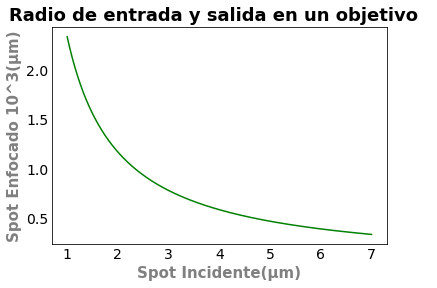

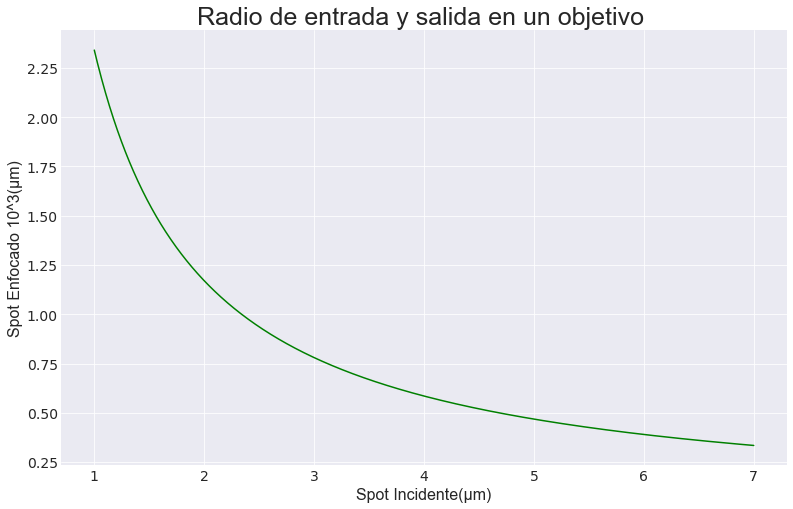

In [4]:
NA=0.65
lamda=405*10**(-3)
AC=5.9*10**(3) # tamaño del spot de entrada
D=2*10**(3) 
r=0.22*lamda/(NA)
f=(AC)/(NA*2)
d=4*f*lamda/(np.pi*D)
print(d,'diametro')

def Diametro (fo,lam, Di): 
    d = 4*fo*lam/(np.pi*Di*1000);
    return d




x=np.linspace(1,7,1000)

y=np.array([Diametro(f,lamda,t) for t in x])
#plt.ylim(-0.2,1.2)

plt.plot(x,y,'green')
plt.tick_params(labelsize=14,length=0)
plt.title('Radio de entrada y salida en un objetivo  ', weight='bold',size=18, color='black')
plt.ylabel('Spot Enfocado 10^3(μm)',weight='bold',size=15, color='gray')
plt.xlabel('Spot Incidente(μm)', weight='bold',size=15, color='gray')
#plt.grid()
plt.show()
csfont = {'fontname':'Arial'}
hfont = {'fontname':'Helvetica'}
with plt.style.context('seaborn-darkgrid'):
        plt.figure(figsize=(13,8))
        #plt.xlim(0,500)
        plt.plot(x,y,'green')
        plt.ylabel('Spot Enfocado 10^3(μm)',size=16,**csfont)
        plt.xlabel('Spot Incidente(μm)',size=16, **csfont)
        #plt.legend(loc='upper right', fontsize=15, frameon=1 )
        plt.title('Radio de entrada y salida en un objetivo ', size=25, **csfont )
        
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
plt.show()

# Cuál es el tamaño del spot del laser 

Si es un spot gaussiano medido con ccd es de tamaño 
Los rayos láser suelen estar muy bien colimados. La difracción hace que las ondas de luz se propaguen transversalmente a medida que se propagan y, por lo tanto, es imposible tener un haz perfectamente colimado. El ángulo de divergencia de difracción limitada de un haz de Gauss con un diámetro D y λ la longitud de onda es $Θ = 4 ⋅ λ / Π ⋅ D $. 

In [129]:
lamda=405*10**(-3)
D=1*10**3
theta=4*lamda/(np.pi*D)
print(theta*1000, 'mrad. es decir, el haz se extiende 1,3 mm en una distancia de 1 metro.')


0.5156620156177409 mrad. es decir, el haz se extiende 1,3 mm en una distancia de 1 metro.


# cual es la divergencia producida por el galvo 

La desviación del galvo depende de la amplitu de la onda que se suminstre al gnerador de ondas 


0.225
El angulo es: 1.4320961841646465 a una distancia 9  del galvo 



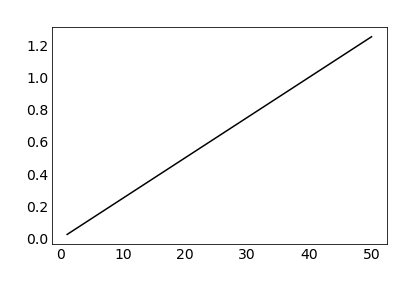

El radio del ancho del spot q barre el galvo a una distancia 50 es 0.225 cm


In [287]:
d1=9
ancho=0.45/2
print(ancho)


theta_galvo= np.arctan(ancho/d1)*180/np.pi
print('El angulo es:', theta_galvo, 'a una distancia', d1, ' del galvo \n' )

d2=50

def conoG (theta,D2): 
    cono = np.tan(theta*(np.pi/180))*D2;
    return cono

x=np.linspace(1,d2,100)

y=np.array([conoG(theta_galvo,t) for t in x])
#plt.ylim(-0.2,1.2)

plt.plot(x,y,'black')
plt.tick_params(labelsize=14,length=0)
plt.title('Crecimiento del Spot', weight='bold',size=18, color='white')
plt.ylabel(' Grados(°)',weight='bold',size=15, color='white')
plt.xlabel('Longitud (cm)', weight='bold',size=15, color='white')
#plt.grid()
plt.show()
#cono=np.tan(theta_galvo*np.pi/180)/d2
print('El radio del ancho del spot q barre el galvo a una distancia', d2, 'es', conoG(theta_galvo, 9), 'cm')


In [3]:
#80MV

d1=30
ancho=0.5

theta_galvo= np.arctan(ancho/d1)*(180/np.pi)
print('El angulo es:', theta_galvo, 'a una distancia', d1, ' del galvo \n' )

d2=82
conoG=np.tan(theta_galvo*np.pi/180)*d2
print('El radio del ancho del spot q barre el galvo a una distancia', d2, 'es', conoG, 'cm')

El angulo es: 0.9548412538721887 a una distancia 30  del galvo 

El radio del ancho del spot q barre el galvo a una distancia 82 es 1.3666666666666667 cm


In [ ]:
#100MV

d1=45
ancho=0.8

theta_galvo= np.arctan(ancho/d1)*(180/np.pi)
print('El angulo es:', theta_galvo, 'a una distancia', d1, ' del galvo \n' )

d2=82
conoG=np.tan(theta_galvo*np.pi/180)*d2
print('El radio del ancho del spot q barre el galvo a una distancia', d2, 'es', conoG, 'cm')


In [14]:
#25mv

d1=45
ancho=0.25

theta_galvo= np.arctan(ancho/d1)*(180/np.pi)
print('El angulo es:', theta_galvo, 'a una distancia', d1, ' del galvo \n' )

d2=82
conoG=np.tan(theta_galvo*np.pi/180)*d2
print('El radio del ancho del spot q barre el galvo a una distancia', d2, 'es', conoG, 'cm')

El angulo es: 0.31830661145136596 a una distancia 45  del galvo 

El radio del ancho del spot q barre el galvo a una distancia 82 es 0.45555555555555555 cm


# telescopio Galileano 

In [197]:
#la distancia fe coincide con el enfoque donde esta el galvo 

fe=-10
fo=20
d=fe+fo
print('la ditancia entre las lentes es:', d)
M=-fo/fe
print('la amplitud de las imagenes es:',M)
M1=2
Fo=-M1*fe
print('Si queremos una amplificacion',M1, 'se tiene que utilzar una lente de plano conveza de',Fo,'cm') 

la ditancia entre las lentes es: 10
la amplitud de las imagenes es: 2.0
Si queremos una amplificacion 2 se tiene que utilzar una lente de plano conveza de 20 cm


# Microscopio kepleriano 